In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
target_terms = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")
# Variables for holding sentiments
sentiments = []
for target in target_terms:
    # Counter
    counter = 1
    # Variable for max_id
    oldest_tweet = None
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        public_tweets = api.user_timeline(target, max_id = oldest_tweet)
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
            sentiments.append({"Tweet Account": target,
                               "Text": tweet["text"],
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
            counter += 1

In [7]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd = sentiments_pd[["Tweet Account","Text","Date",
                               "Compound","Positive","Negative","Neutral","Tweets Ago"]]
sentiments_pd

,Tweet Account,Text,Date,Compound,Positive,Negative,Neutral,Tweets Ago
0,@BBC,😼 This seven-week-old jaguar is on a serious m...,Wed Apr 04 07:00:06 +0000 2018,-0.1511,0.000,0.834,0.166,1
1,@BBC,Philomena Cunk's landmark mockumentary series ...,Tue Apr 03 20:03:05 +0000 2018,0.0772,0.071,0.929,0.000,2
2,@BBC,🎭 Andrew Scott performs the opening lines of #...,Tue Apr 03 18:03:05 +0000 2018,0.0000,0.000,1.000,0.000,3
3,@BBC,No time to shop or cook? No problem! \n🍠🥑🍅🍗🥒\n...,Tue Apr 03 17:03:04 +0000 2018,-0.5411,0.119,0.576,0.304,4
4,@BBC,"RT @BBCTwo: Tonight at 9pm, a cancer surgeon r...",Tue Apr 03 16:22:33 +0000 2018,-0.7351,0.000,0.735,0.265,5
5,@BBC,🐊💦 Fancy a dip? https://t.co/gpfkGcue3C,Tue Apr 03 16:02:04 +0000 2018,0.0000,0.000,1.000,0.000,6
6,@BBC,What's it like to live with a brain tumour? \n...,Tue Apr 03 15:05:05 +0000 2018,0.7351,0.246,0.754,0.000,7
7,@BBC,RT @BBCR1: Yessssss @NiallOfficial's Live Loun...,Tue Apr 03 14:50:24 +0000 2018,0.0000,0.000,1.000,0.000,8
8,@BBC,RT @BBCFOUR: Meet the woman who rocked the dar...,Tue Apr 03 14:47:02 +0000 2018,0.0000,0.000,1.000,0.000,9
9,@BBC,RT @TWBBC: Koko is a gorilla who has learnt si...,Tue Apr 03 14:27:34 +0000 2018,0.0000,0.000,1.000,0.000,10


In [52]:
# export sentiments dataframe to csv
sentiments_pd.to_csv("Media_Sentiments.csv")

In [14]:
# create a color dataframe to reference five tweet account with five colors
color_df = pd.DataFrame({"Tweet Account":["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"],
                         "color": ["lightseagreen","darkorange", "slateblue", "deeppink", "yellowgreen"]    
                         })
color_df = color_df.set_index("color")

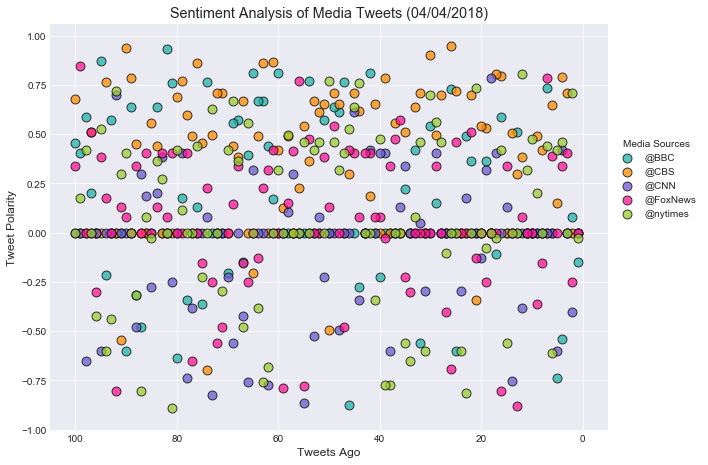

In [50]:
# scatter plot of sentiments of the last 100 tweets sent out by each news organization
plt.figure(figsize=(10,7.5))
plt.style.use('seaborn-darkgrid')
for color in color_df.index.values.tolist():    
    plt.scatter(x=sentiments_pd.loc[sentiments_pd["Tweet Account"]==color_df.loc[color,"Tweet Account"],:]["Tweets Ago"], 
                y=sentiments_pd.loc[sentiments_pd["Tweet Account"]==color_df.loc[color,"Tweet Account"],:]["Compound"], 
                s=80, color=color, label=color_df.loc[color,"Tweet Account"],alpha=0.75,edgecolor="black",linewidths=1)
plt.legend(title="Media Sources",loc='lower left', bbox_to_anchor=(1, 0.5))
# decreasing Tweets Ago
plt.xlim(105, -5)  
plt.title("Sentiment Analysis of Media Tweets (04/04/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.savefig("Scatter_Media_Sentiment.png")
plt.show()

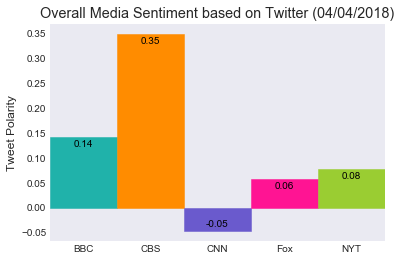

In [53]:
# bar plot visualizing the overall sentiments of the last 100 tweets from each organization
mean_grouby = sentiments_pd.groupby(["Tweet Account"])["Compound"].mean()
plt.style.use('seaborn-dark')
bar_bbc,bar_cbs,bar_cnn,bar_fox,bar_nyt = plt.bar(np.arange(0, 5), [mean_grouby["@BBC"],
                                                                    mean_grouby["@CBS"],
                                                                    mean_grouby["@CNN"],
                                                                    mean_grouby["@FoxNews"],
                                                                    mean_grouby["@nytimes"]], width=1)
# set bar color
bar_bbc.set_color("lightseagreen")
bar_cbs.set_color("darkorange")
bar_cnn.set_color("slateblue")
bar_fox.set_color("deeppink")
bar_nyt.set_color("yellowgreen")

# show overall sentiment on bar
for each_bar in [bar_bbc,bar_cbs,bar_cnn,bar_fox,bar_nyt]:
    if each_bar.get_height()< 0:
        height = each_bar.get_height()
        plt.text(each_bar.get_x() + each_bar.get_width()/2., height+0.015,
                 str('%.2f' %float(height)), ha='center', va='center',color="k")
    else:
        height = each_bar.get_height()
        plt.text(each_bar.get_x() + each_bar.get_width()/2., height-0.015,
                 str('%.2f' %float(height)), ha='center', va='center',color="k")    
plt.xlim(-0.5,4.5)
plt.xticks(np.arange(0, 5), ["BBC", "CBS", "CNN", "Fox", "NYT"])
plt.title("Overall Media Sentiment based on Twitter (04/04/2018)")
plt.ylabel("Tweet Polarity")
plt.savefig("Bar_Overall_Media_Sentiment.png")
plt.show()